In [1]:
from glob import glob
import json
import pandas as pd
from tqdm import tqdm
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib to use Type 42 fonts
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

path = "../.."
dataset = "2009"

In [2]:
jsons = glob(f"{path}/seqfiles_{dataset}/*/seq.json")

In [3]:
data = []
for json_file in tqdm(jsons, desc="Processing JSON files"):
    folder_name = os.path.basename(os.path.dirname(json_file))
    try:
        # Check if the file is not empty
        if os.path.getsize(json_file) > 0:  # Check file size
            with open(json_file) as f:
                json_data = json.load(f)
                p_value = json_data["test results"]["p-value"]
                lrt = json_data["test results"]["LRT"]
                data.append({'name': folder_name, 'p_value': p_value, 'lrt': lrt})
        else:
            print(f"Skipped empty file: {json_file}")
    except (json.JSONDecodeError, KeyError) as e:
        print(f"Error reading file {json_file}: {e}")
        continue

evolution = pd.DataFrame(data)

Processing JSON files:   1%|          | 73/8596 [00:09<07:53, 18.01it/s] 

Skipped empty file: ../../seqfiles_2009/first_STRAIN-ISOLATE_INHABITS_root/seq.json


Processing JSON files:   5%|▌         | 461/8596 [01:01<16:40,  8.13it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_PRODUCES_auxin/seq.json


Processing JSON files:  21%|██        | 1770/8596 [03:49<20:29,  5.55it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-MEDIUM_GROWS_ON_lb/seq.json


Processing JSON files:  36%|███▌      | 3055/8596 [08:04<12:59,  7.11it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-PHENOTYPE_PRESENTS_rod_shaped/seq.json


Processing JSON files:  37%|███▋      | 3220/8596 [08:51<47:35,  1.88it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-PHENOTYPE_PRESENTS_nonmotile/seq.json


Processing JSON files:  38%|███▊      | 3275/8596 [08:56<03:47, 23.35it/s]

Skipped empty file: ../../seqfiles_2009/first_STRAIN-PHENOTYPE_PRESENTS_pgp/seq.json


Processing JSON files:  40%|███▉      | 3404/8596 [09:08<05:59, 14.45it/s]

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_PRODUCES_sugar/seq.json


Processing JSON files:  44%|████▍     | 3784/8596 [09:58<10:20,  7.76it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_PRODUCES_indole_3_acetic_acid/seq.json


Processing JSON files:  49%|████▊     | 4180/8596 [10:56<05:36, 13.11it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-ORGANISM_INFECTS_galleria_mellonella_larvae/seq.json


Processing JSON files:  53%|█████▎    | 4598/8596 [12:00<05:06, 13.05it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-MEDIUM_GROWS_ON_nb/seq.json


Processing JSON files:  54%|█████▍    | 4665/8596 [12:10<04:17, 15.24it/s]

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_RESISTS_tobramycin/seq.json


Processing JSON files:  66%|██████▋   | 5708/8596 [15:17<03:45, 12.78it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_PRODUCES_phas/seq.json


Processing JSON files:  76%|███████▋  | 6556/8596 [17:30<02:53, 11.78it/s]  

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_PRODUCES_glycine_betaine/seq.json


Processing JSON files:  96%|█████████▌| 8223/8596 [21:23<00:41,  8.88it/s]

Skipped empty file: ../../seqfiles_2009/first_STRAIN-COMPOUND_RESISTS_imipenem/seq.json


Processing JSON files:  96%|█████████▌| 8244/8596 [21:25<00:40,  8.63it/s]

Skipped empty file: ../../seqfiles_2009/first_STRAIN-ISOLATE_INHABITS_rhizosphere/seq.json


Processing JSON files: 100%|██████████| 8596/8596 [22:40<00:00,  6.32it/s]


In [4]:
# Calculate the number of genes with evidence for positive selection
# We consider p-value < 0.05 as evidence for positive selection
# Filter out rows with NaN p-values (which could be from empty files)
valid_p_values = evolution['p_value'].dropna()
num_positive_selection = (valid_p_values < 0.05).sum()

# Calculate the percentage of genes with evidence for positive selection
percent_positive_selection = (num_positive_selection / len(valid_p_values)) * 100

print(f"Number of genes with evidence for positive selection: {num_positive_selection}")
print(f"Percentage of genes with evidence for positive selection: {percent_positive_selection:.2f}%")
print(f"Total number of genes with valid p-values: {len(valid_p_values)}")
print(f"Number of genes with missing p-values: {len(evolution) - len(valid_p_values)}")

Number of genes with evidence for positive selection: 2649
Percentage of genes with evidence for positive selection: 30.87%
Total number of genes with valid p-values: 8581
Number of genes with missing p-values: 0


In [5]:
evolution["name"] = evolution["name"].str.replace("_ASSOCIATED_WITH", ":ASSOCIATEDWITH")
evolution["name"] = evolution["name"].str.replace("_GROWS_ON", ":GROWSON")
evolution["name"] = evolution["name"].str.replace("_INHIBITS", ":INHIBITS")
evolution["name"] = evolution["name"].str.replace("_INHABITS", ":INHABITS")
evolution["name"] = evolution["name"].str.replace("_INFECTS", ":INFECTS")
evolution["name"] = evolution["name"].str.replace("_PRESENTS", ":PRESENTS")
evolution["name"] = evolution["name"].str.replace("_DEGRADES", ":DEGRADES")
evolution["name"] = evolution["name"].str.replace("_PRODUCES", ":PRODUCES")
evolution["name"] = evolution["name"].str.replace("_PROMOTES", ":PROMOTES")
evolution["name"] = evolution["name"].str.replace("_RESISTS", ":RESISTS")
evolution

,name,p_value,lrt
0,first_COMPOUND-STRAIN:INHIBITS_hydroquinine,0.323706,0.869545
1,first_STRAIN-ORGANISM:INHABITS_olive_tree,0.000000,155.607497
2,first_COMPOUND-STRAIN:INHIBITS_pg,0.462430,0.156226
3,first_STRAIN-PHENOTYPE:PRESENTS_rough,0.117489,2.896519
4,first_STRAIN-COMPOUND:RESISTS_ceftiofur,0.002987,10.240349
...,...,...,...
8576,first_STRAIN-COMPOUND:PRODUCES_mono-rl,0.500000,0.000000
8577,first_STRAIN-EFFECT:PRESENTS_anti_inflammatory...,0.132954,2.649216
8578,first_STRAIN-ISOLATE:INHABITS_feces_samples_of...,0.011522,7.540645
8579,first_STRAIN-DISEASE:INHIBITS_kidney_stones,0.244673,1.429367


In [6]:
evolution["gene"] = evolution.name.str.split("_",expand=True,n=2)[0]
evolution["rel"] = evolution.name.str.split("_",expand=True,n=2)[1]
evolution["ner"] = evolution.name.str.split("_",expand=True,n=2)[2]

In [7]:
evolution["rel"] = evolution["rel"].str.replace("ASSOCIATEDWITH","ASSOCIATED_WITH")
evolution["rel"] = evolution["rel"].str.replace("GROWSON","GROWS_ON")

In [8]:
with open(f"{path}/xgboost/annotations{dataset}/binary/binary.pkl", 'rb') as f:
#with open(f"{path}/binary.pkl", 'rb') as f:
	d = pickle.load(f)
rels =	[i.split("/")[-1].split(".")[0] for i in glob(f"{path}/xgboost/annotations{dataset}/*.parquet")]
l = []
for rel in tqdm(rels):
	for i in range(len(d[rel])):
		s = pd.Series(d[rel][i][2].get_score(importance_type="gain"))
		if len(s) > 0:
			importance_values = s.sort_values(ascending=False).values
			genes = s.sort_values(ascending=False).index.to_list()
			importance_ranking = s.sort_values(ascending=False).rank(ascending=False).values
			accuracy = d[rel][i][1]
			ner = d[rel][i][0][0]
			for j in range(len(importance_values)):
				l.append([rel, ner,genes[j], importance_values[j], importance_ranking[j],accuracy])
df = pd.DataFrame(l, columns=["rel","ner","gene","importance_values","importance_ranking","accuracy"])

100%|██████████| 17/17 [00:37<00:00,  2.23s/it]


In [9]:
df.to_csv("evolution_files/evolution.csv")

In [10]:
df  = pd.read_csv("evolution_files/evolution.csv")

In [11]:
df.value_counts("rel")

rel
STRAIN-MEDIUM:GROWS_ON            257937
STRAIN-COMPOUND:PRODUCES          240099
STRAIN-PHENOTYPE:PRESENTS         215390
STRAIN-ISOLATE:INHABITS           154213
COMPOUND-STRAIN:INHIBITS          131820
STRAIN-COMPOUND:RESISTS            75282
STRAIN-ORGANISM:INFECTS            43410
STRAIN-COMPOUND:DEGRADES           43080
STRAIN-DISEASE:INHIBITS            40828
STRAIN-ORGANISM:INHABITS           34357
STRAIN-DISEASE:ASSOCIATED_WITH     29976
STRAIN-EFFECT:PRESENTS             13534
STRAIN-EFFECT:PROMOTES             12566
STRAIN-EFFECT:INHIBITS              7398
STRAIN-ORGANISM:SYMBIONT_OF         7199
STRAIN-SPECIES:INHIBITS             7009
STRAIN-ORGANISM:INHIBITS            6908
Name: count, dtype: int64

In [12]:
df["ner"] = df.ner.str.replace(' ','_').str.replace("'",'').str.replace('(','_').str.replace(')','_')

In [13]:
df = df[df["importance_ranking"]==1]

In [14]:
all_merged = df.merge(evolution, on=["ner","rel"]).drop(columns="gene_y")

In [15]:
all_merged.sort_values("lrt",ascending=False).to_csv("evolution_files/positive_selection.csv",index=False)

In [16]:
all_merged

,Unnamed: 0,rel,ner,gene_x,importance_values,importance_ranking,accuracy,name,p_value,lrt
0,312,STRAIN-DISEASE:ASSOCIATED_WITH,infections,"CRISPR-associated endonuclease Cas9, PI domain...",15.415527,1.0,0.977887,first_STRAIN-DISEASE:ASSOCIATEDWITH_infections,9.217627e-10,40.223172
1,609,STRAIN-DISEASE:ASSOCIATED_WITH,urinary_tract_infection,YjgF/YER057c/UK114 family,30.137436,1.0,0.980835,first_STRAIN-DISEASE:ASSOCIATEDWITH_urinary_tr...,5.000000e-01,0.000000
2,937,STRAIN-DISEASE:ASSOCIATED_WITH,pneumonia,Protein of unknown function DUF4850,25.008026,1.0,0.981818,first_STRAIN-DISEASE:ASSOCIATEDWITH_pneumonia,3.331383e-01,0.812101
3,1261,STRAIN-DISEASE:ASSOCIATED_WITH,meningitis,"Pullulanase, carbohydrate-binding module 41",18.105927,1.0,0.979361,first_STRAIN-DISEASE:ASSOCIATEDWITH_meningitis,2.300085e-08,33.789175
4,1549,STRAIN-DISEASE:ASSOCIATED_WITH,diarrhea,"KilA-N, DNA-binding domain",15.162553,1.0,0.978870,first_STRAIN-DISEASE:ASSOCIATEDWITH_diarrhea,2.283484e-02,6.172641
...,...,...,...,...,...,...,...,...,...,...
8390,1320613,STRAIN-MEDIUM:GROWS_ON,prereduced_modified_gam,"GMP synthase, C-terminal",4.911266,1.0,0.999896,first_STRAIN-MEDIUM:GROWSON_prereduced_modifie...,0.000000e+00,116.929251
8391,1320706,STRAIN-MEDIUM:GROWS_ON,neidhardt_mops_minimal_medium,"Restriction endonuclease, type I, HsdR, N-term...",3.301188,1.0,0.999896,first_STRAIN-MEDIUM:GROWSON_neidhardt_mops_min...,5.000000e-01,0.000000
8392,1320747,STRAIN-MEDIUM:GROWS_ON,f,"ATP-grasp domain, R2K clade family 2",2.706501,1.0,0.999896,first_STRAIN-MEDIUM:GROWSON_f,5.000000e-01,0.000000
8393,1320828,STRAIN-MEDIUM:GROWS_ON,nyciii__broth,Methyltransferase domain 25,3.744675,1.0,0.999896,first_STRAIN-MEDIUM:GROWSON_nyciii__broth,0.000000e+00,255.413678


In [17]:
all_merged["-log10(p_value)"] = -1 * all_merged["p_value"].apply(np.log10)
all_merged["logLRT"] = all_merged["lrt"].apply(np.log10)
all_merged["log_imp"] = all_merged["importance_values"].apply(np.log10)

In [18]:
all_merged.sort_values("lrt",ascending=False).head(30)

,Unnamed: 0,rel,ner,gene_x,importance_values,importance_ranking,accuracy,name,p_value,lrt,-log10(p_value),logLRT,log_imp
5618,892278,STRAIN-PHENOTYPE:PRESENTS,aerobic_gram_negative,"TonB-dependent receptor, plug domain",7.956153,1.0,0.998767,first_STRAIN-PHENOTYPE:PRESENTS_aerobic_gram_n...,0.0,23378.686957,inf,4.368820,0.900703
2048,346872,STRAIN-COMPOUND:PRODUCES,ape,Protein of unknown function DUF1810,4.167343,1.0,0.999661,first_STRAIN-COMPOUND:PRODUCES_ape,0.0,13011.085354,inf,4.114314,0.619859
1074,173484,STRAIN-COMPOUND:PRODUCES,lysine,AMP-dependent synthetase/ligase domain,7.554930,1.0,0.998372,first_STRAIN-COMPOUND:PRODUCES_lysine,0.0,8940.741778,inf,3.951374,0.878230
1781,312168,STRAIN-COMPOUND:PRODUCES,hopene,GAF domain,4.539406,1.0,0.999729,first_STRAIN-COMPOUND:PRODUCES_hopene,0.0,7039.746201,inf,3.847557,0.656999
1322,236723,STRAIN-COMPOUND:PRODUCES,lipooligosaccharide,MarR-type HTH domain,7.577530,1.0,0.999389,first_STRAIN-COMPOUND:PRODUCES_lipooligosaccha...,0.0,5614.818718,inf,3.749336,0.879528
5580,881798,STRAIN-PHENOTYPE:PRESENTS,alkaliphilic,"Helix-turn-helix, HxlR type",13.070918,1.0,0.998507,first_STRAIN-PHENOTYPE:PRESENTS_alkaliphilic,0.0,5165.413000,inf,3.713105,1.116306
5053,755307,STRAIN-COMPOUND:RESISTS,rifampicin,PPE domain,35.844482,1.0,0.981303,first_STRAIN-COMPOUND:RESISTS_rifampicin,0.0,4764.696384,inf,3.678035,1.554422
1282,227699,STRAIN-COMPOUND:PRODUCES,valine,HAMP domain,6.117679,1.0,0.999186,first_STRAIN-COMPOUND:PRODUCES_valine,0.0,4408.153346,inf,3.644257,0.786587
3255,531589,STRAIN-ISOLATE:INHABITS,hot_spring_water,ABC3 transporter permease protein domain,3.890463,1.0,0.999803,first_STRAIN-ISOLATE:INHABITS_hot_spring_water,0.0,3867.276306,inf,3.587405,0.590001
2349,378432,STRAIN-COMPOUND:PRODUCES,compound_1,Acyl transferase domain,2.688553,1.0,0.999864,first_STRAIN-COMPOUND:PRODUCES_compound_1,0.0,3473.289794,inf,3.540741,0.429519


Top 10 genes with highest evidence for positive selection:
                                        gene_x                        rel  \
5618      TonB-dependent receptor, plug domain  STRAIN-PHENOTYPE:PRESENTS   
2048       Protein of unknown function DUF1810   STRAIN-COMPOUND:PRODUCES   
1074    AMP-dependent synthetase/ligase domain   STRAIN-COMPOUND:PRODUCES   
1781                                GAF domain   STRAIN-COMPOUND:PRODUCES   
1322                      MarR-type HTH domain   STRAIN-COMPOUND:PRODUCES   
5580               Helix-turn-helix, HxlR type  STRAIN-PHENOTYPE:PRESENTS   
5053                                PPE domain    STRAIN-COMPOUND:RESISTS   
1282                               HAMP domain   STRAIN-COMPOUND:PRODUCES   
3255  ABC3 transporter permease protein domain    STRAIN-ISOLATE:INHABITS   
2349                   Acyl transferase domain   STRAIN-COMPOUND:PRODUCES   

                        ner           lrt  -log10(p_value)    logLRT   log_imp  
5618  aerobi

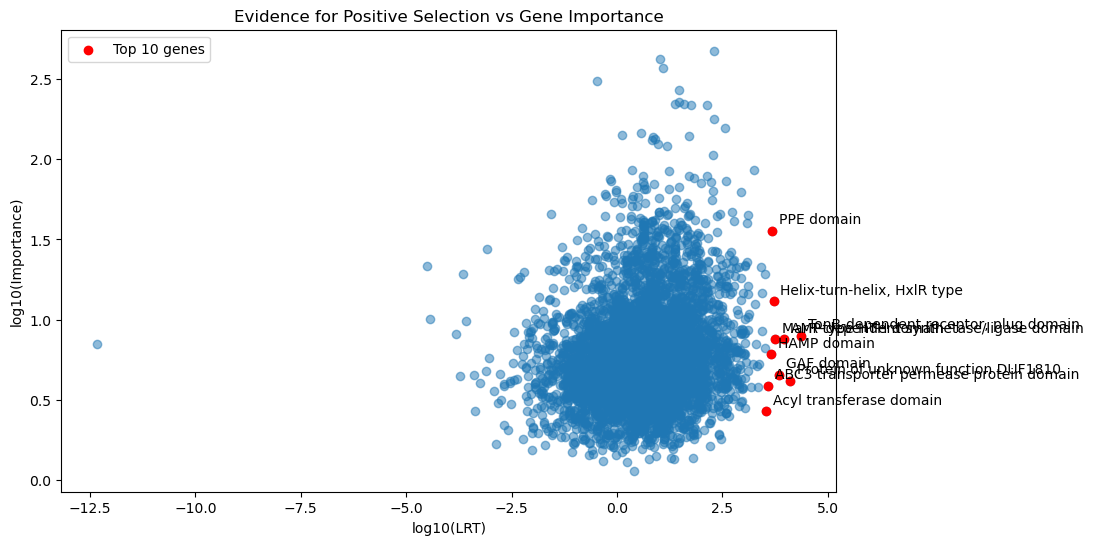

In [21]:
# Sort the dataframe by LRT in descending order and select top genes
top_genes = all_merged.sort_values("lrt", ascending=False).head(10)

# Display the top genes with highest evidence for positive selection
print("Top 10 genes with highest evidence for positive selection:")
print(top_genes[["gene_x", "rel", "ner", "lrt", "-log10(p_value)", "logLRT", "log_imp"]])

# Create a scatter plot of logLRT vs log_imp for visual representation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(all_merged["logLRT"], all_merged["log_imp"], alpha=0.5)
plt.scatter(top_genes["logLRT"], top_genes["log_imp"], color="red", label="Top 10 genes")

for i, row in top_genes.iterrows():
    plt.annotate(row["gene_x"], (row["logLRT"], row["log_imp"]), xytext=(5, 5), textcoords="offset points")

plt.xlabel("log10(LRT)")
plt.ylabel("log10(Importance)")
plt.title("Evidence for Positive Selection vs Gene Importance")
plt.legend()
plt.show()


/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/2321797987.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))


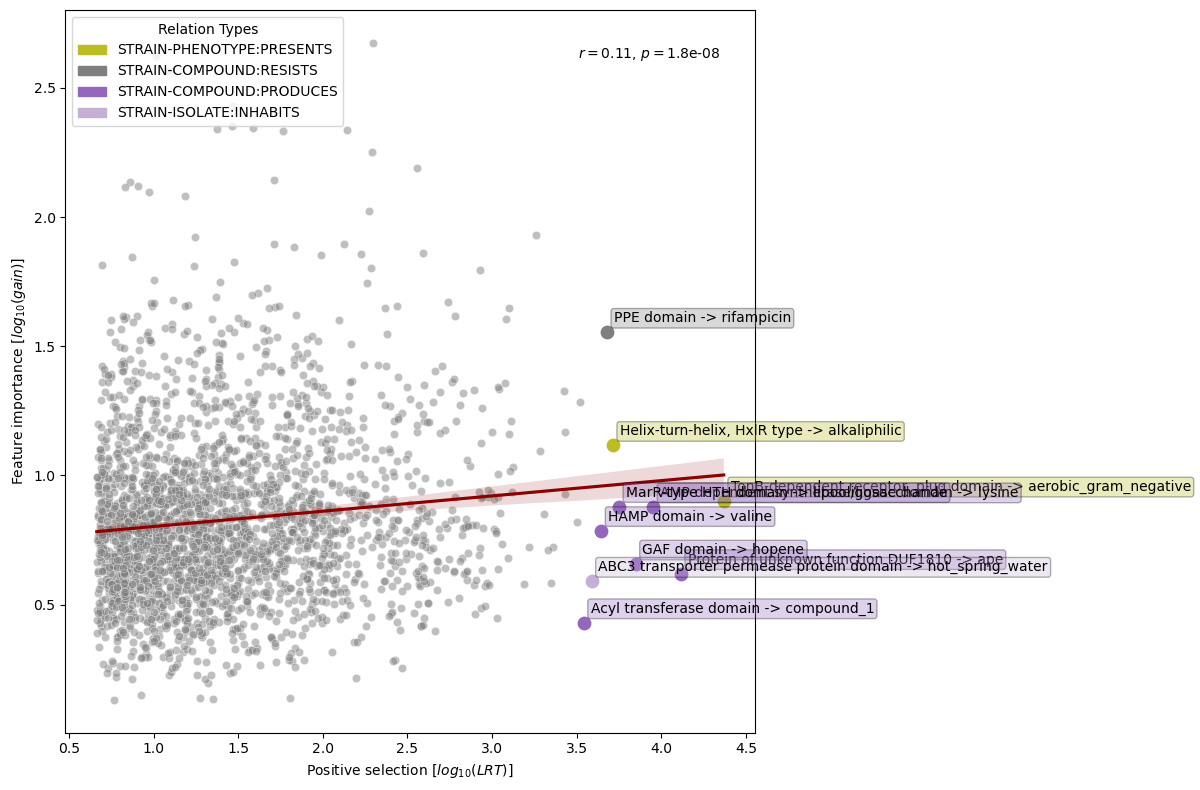

In [22]:
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the x and y values, filtering out np.nan values
filtered_data = all_merged[all_merged.p_value < 0.05].dropna(subset=['logLRT', 'log_imp'])
x = filtered_data['logLRT']
y = filtered_data['log_imp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a color map for rel types
rel_types = filtered_data['rel'].unique()
color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))

# Create a scatter plot with regression line using seaborn
plt.figure(figsize=(12, 8))

# Plot all points in gray
sns.scatterplot(x=x, y=y, alpha=0.5, color='#808080')

# Plot regression line
sns.regplot(x=x, y=y, 
            scatter=False,
            line_kws={'color': '#8B0000'},  # Dark red line
            ci=95, 
            color='#8B0000')  # Dark red shade

# Annotate genes with higher evidence for positive selection
top_genes = filtered_data.nlargest(10, 'logLRT')
top_rels = set(top_genes['rel'])

# Plot top 10 points with colors based on relation type
for _, row in top_genes.iterrows():
    plt.scatter(row['logLRT'], row['log_imp'], color=color_map[row['rel']], s=80, zorder=3)  # Reduced size from 100 to 80
    plt.annotate(f"{row['gene_x']} -> {row['ner']}", 
                 xy=(row['logLRT'], row['log_imp']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 ha='left',
                 va='bottom',
                 bbox=dict(boxstyle='round,pad=0.2', fc=color_map[row['rel']], alpha=0.3),
                 zorder=4)

# Add the r value and p-value as text on the side
plt.text(0.95, 0.95, f'$r = ${r_value:.2f}, $p=${p_value:.2g}', 
         ha='right', va='top', transform=plt.gca().transAxes)

# Set the labels and title
plt.ylabel('Feature importance [$log_{10}(gain)$]')
plt.xlabel('Positive selection [$log_{10}(LRT)$]')

# Create legend only for rels found in top 10
legend_patches = [mpatches.Patch(color=color_map[rel], label=rel) for rel in top_rels]
plt.legend(handles=legend_patches, title='Relation Types', loc='upper left')

plt.tight_layout()

# Save the figure to a file as PDF
plt.savefig('figures/xgboost/feature_importance_vs_positive_selection.pdf', bbox_inches='tight')


/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/1988406404.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))
/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/1988406404.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes = filtered_data.groupby('rel', group_keys=False).apply(lambda grp: grp.nlargest(10, 'logLRT'))


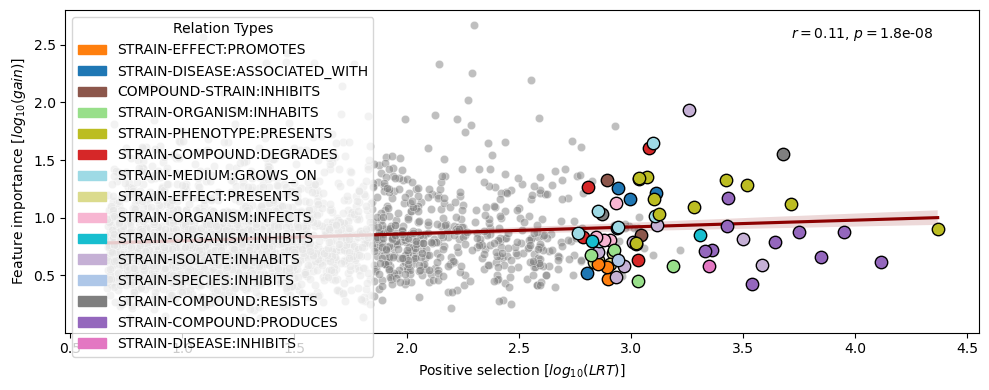

In [23]:
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define the x and y values, filtering out np.nan values
filtered_data = all_merged[all_merged.p_value < 0.05].dropna(subset=['logLRT', 'log_imp'])
x = filtered_data['logLRT']
y = filtered_data['log_imp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a color map for rel types
rel_types = filtered_data['rel'].unique()
color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))

# Create a scatter plot with regression line using seaborn
plt.figure(figsize=(10, 4))

# Plot all points in gray
sns.scatterplot(x=x, y=y, alpha=0.5, color='#808080')

# Plot regression line
sns.regplot(x=x, y=y, 
            scatter=False,
            line_kws={'color': '#8B0000'},  # Dark red line
            ci=95, 
            color='#8B0000')  # Dark red shade

# Select the top 2 for each rel category based on logLRT
top_genes = filtered_data.groupby('rel', group_keys=False).apply(lambda grp: grp.nlargest(10, 'logLRT'))

# Filter to only include those with logLRT > 3
top_genes = top_genes[top_genes['logLRT'] > 2.75]

top_rels = set(top_genes['rel'])

# Plot top points with colors based on relation type and annotate them
for _, row in top_genes.iterrows():
    plt.scatter(row['logLRT'], row['log_imp'], color=color_map[row['rel']], s=80, zorder=3, edgecolors='black', linewidth=1)
#    plt.annotate(f"{row['gene_x']} -> {row['ner']}", 
#                 xy=(row['logLRT'], row['log_imp']),
#                 xytext=(5, 5),
#                 textcoords='offset points',
#                 ha='left',
#                 va='bottom',
#                 bbox=dict(boxstyle='round,pad=0.2', fc=color_map[row['rel']], alpha=0.3),
#                 zorder=4)

# Add the r value and p-value as text on the side
plt.text(0.95, 0.95, f'$r = ${r_value:.2f}, $p=${p_value:.2g}', 
         ha='right', va='top', transform=plt.gca().transAxes)

# Set the labels and title
plt.ylabel('Feature importance [$log_{10}(gain)$]')
plt.xlabel('Positive selection [$log_{10}(LRT)$]')

# Create legend for the rel types shown
legend_patches = [mpatches.Patch(color=color_map[rel], label=rel) for rel in top_rels]
plt.legend(handles=legend_patches, title='Relation Types', loc='upper left')

plt.tight_layout()

# Save the figure to a file as PDF
plt.savefig('figures/xgboost/feature_importance_vs_positive_selection.pdf', bbox_inches='tight')

In [33]:
import pandas as pd

# Filter data
filtered_data = all_merged[all_merged.p_value < 0.05].dropna(subset=['logLRT', 'log_imp'])

# Select the top 2 for each rel category based on logLRT
top_genes = (filtered_data
             .groupby('rel', group_keys=False)
             .apply(lambda grp: grp.nlargest(2, 'logLRT')))

# Filter to only include those with logLRT > 3
top_genes = top_genes[top_genes['logLRT'] > 2.25]

print(top_genes[["gene_x","ner","rel","logLRT","log_imp"]].sort_values("logLRT", ascending=False).set_index("rel").to_latex())

/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/2978648377.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.nlargest(2, 'logLRT')))


\begin{tabular}{lllrr}
\toprule
 & gene_x & ner & logLRT & log_imp \\
rel &  &  &  &  \\
\midrule
STRAIN-PHENOTYPE:PRESENTS & TonB-dependent receptor, plug domain & aerobic_gram_negative & 4.368820 & 0.900703 \\
STRAIN-COMPOUND:PRODUCES & Protein of unknown function DUF1810 & ape & 4.114314 & 0.619859 \\
STRAIN-COMPOUND:PRODUCES & AMP-dependent synthetase/ligase domain & lysine & 3.951374 & 0.878230 \\
STRAIN-PHENOTYPE:PRESENTS & Helix-turn-helix, HxlR type & alkaliphilic & 3.713105 & 1.116306 \\
STRAIN-COMPOUND:RESISTS & PPE domain & rifampicin & 3.678035 & 1.554422 \\
STRAIN-ISOLATE:INHABITS & ABC3 transporter permease protein domain & hot_spring_water & 3.587405 & 0.590001 \\
STRAIN-ISOLATE:INHABITS & Beta-ketoacyl synthase-like, N-terminal & seeds & 3.500331 & 0.820775 \\
STRAIN-DISEASE:INHIBITS & AMP-binding enzyme, C-terminal domain & black_rot & 3.349809 & 0.583871 \\
STRAIN-ORGANISM:INHIBITS & Molybdenum cofactor biosynthesis protein F, N-terminal & rhizoctonia_solani & 3.30699

/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/1293110890.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subsampled_data = filtered_data[filtered_data['rel'].isin(valid_categories)].groupby('rel').apply(lambda x: x.sample(n=SAMPLES_PER_CATEGORY, random_state=42)).reset_index(drop=True)
/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/1293110890.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))


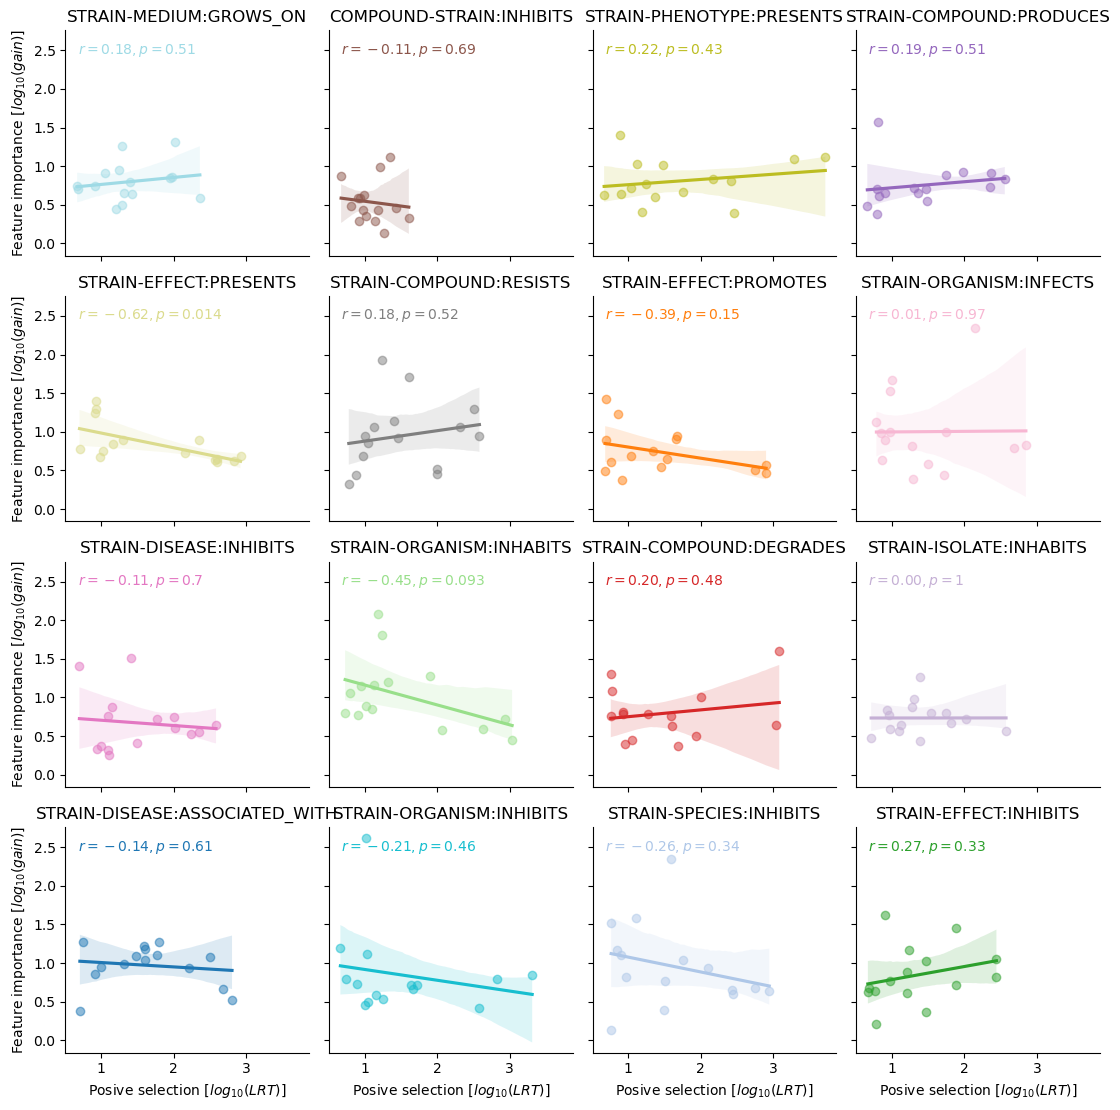

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.patches as mpatches

# Set the color palette to the accent color set
sns.set_palette("Dark2")

# Define the number of samples to use for each category
SAMPLES_PER_CATEGORY = 15

# Define the desired order for 'rel' categories
category_order = [
    "STRAIN-MEDIUM:GROWS_ON",
    "COMPOUND-STRAIN:INHIBITS",
    "STRAIN-PHENOTYPE:PRESENTS",
    "STRAIN-COMPOUND:PRODUCES",
    "STRAIN-EFFECT:PRESENTS",
    "STRAIN-COMPOUND:RESISTS",
    "STRAIN-EFFECT:PROMOTES",
    "STRAIN-ORGANISM:INFECTS",
    "STRAIN-DISEASE:INHIBITS",
    "STRAIN-ORGANISM:INHABITS",
    "STRAIN-COMPOUND:DEGRADES",
    "STRAIN-ISOLATE:INHABITS",
    "STRAIN-DISEASE:ASSOCIATED_WITH",
    "STRAIN-ORGANISM:INHIBITS",
    "STRAIN-SPECIES:INHIBITS",
    "STRAIN-ORGANISM:SYMBIONT_OF",
    "STRAIN-EFFECT:INHIBITS"
]

# Filter the dataset as per your conditions
filtered_data = all_merged[
    (all_merged.p_value < 0.05) & 
    (all_merged.rel.isin(category_order))
]

# Count the number of samples in each category
category_counts = filtered_data['rel'].value_counts()

# Keep only categories with at least SAMPLES_PER_CATEGORY samples
valid_categories = category_counts[category_counts >= SAMPLES_PER_CATEGORY].index.tolist()

# Update the category_order to include only valid categories
category_order = [cat for cat in category_order if cat in valid_categories]

# Subsample SAMPLES_PER_CATEGORY values from each valid category
subsampled_data = filtered_data[filtered_data['rel'].isin(valid_categories)].groupby('rel').apply(lambda x: x.sample(n=SAMPLES_PER_CATEGORY, random_state=42)).reset_index(drop=True)

# Initialize a dictionary to store regression results
regression_results = {}

# Calculate regression statistics for each 'rel' subset after removing infinite values
for rel in category_order:
    subset = subsampled_data[subsampled_data['rel'] == rel]
    
    # Remove rows with infinite values in 'logLRT' or 'log_imp'
    subset_clean = subset[np.isfinite(subset['logLRT']) & np.isfinite(subset['log_imp'])]
    
    if not subset_clean.empty:  # Only calculate if there's valid data
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(subset_clean['logLRT'], subset_clean['log_imp'])
        
        # Store results in the dictionary
        regression_results[rel] = {
            'r': r_value,
            'p_value': p_value,
            'slope': slope,
            'intercept': intercept
        }
    else:
        # Store None if the subset is empty after filtering
        regression_results[rel] = None

# Get the color map for the top 10 categories
rel_types = filtered_data['rel'].unique()
color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))

# Your code for plotting the dataframe
g = sns.lmplot(
    x="logLRT", 
    y="log_imp", 
    col="rel", 
    hue="rel", 
    data=subsampled_data, 
    aspect=1, 
    height=2.8, 
    scatter_kws={"alpha": 0.5},
    col_order=category_order,  # Set column order
    hue_order=category_order,  # Set hue order
    col_wrap=4,  # Wrap the columns after every 3 plots
    palette=color_map  # Use the color map for the categories
)

g.set_axis_labels("Posive selection [$log_{10}(LRT)$]", "Feature importance [$log_{10}(gain)$]")

# Add text annotations for each subplot and set titles
for ax, rel in zip(g.axes.flat, category_order):
    results = regression_results[rel]
    
    if results is not None:  # Only add text if there were valid results
        # Get the color used for the line plot
        line_color = color_map[rel]
        
        # Add text annotations for r and p-value
        ax.text(
            0.05, 0.95,  # X and Y positions (in axis units)
            f'$r = {results["r"]:.2f}, p = {results["p_value"]:.2g}$',
            transform=ax.transAxes,  # Use axis coordinates for positioning
            verticalalignment='top',  # Align text at the top
            color=line_color  # Use the same color as the line
        )

    # Set the title of each subplot 1to just the value of 'rel'
    ax.set_title(rel)

plt.tight_layout()
plt.savefig("figures/xgboost/positive_selection_latest.pdf", bbox_inches="tight")
plt.show()

/scratch/slurm_tmpdir/job_25070053/ipykernel_183949/1089518001.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))


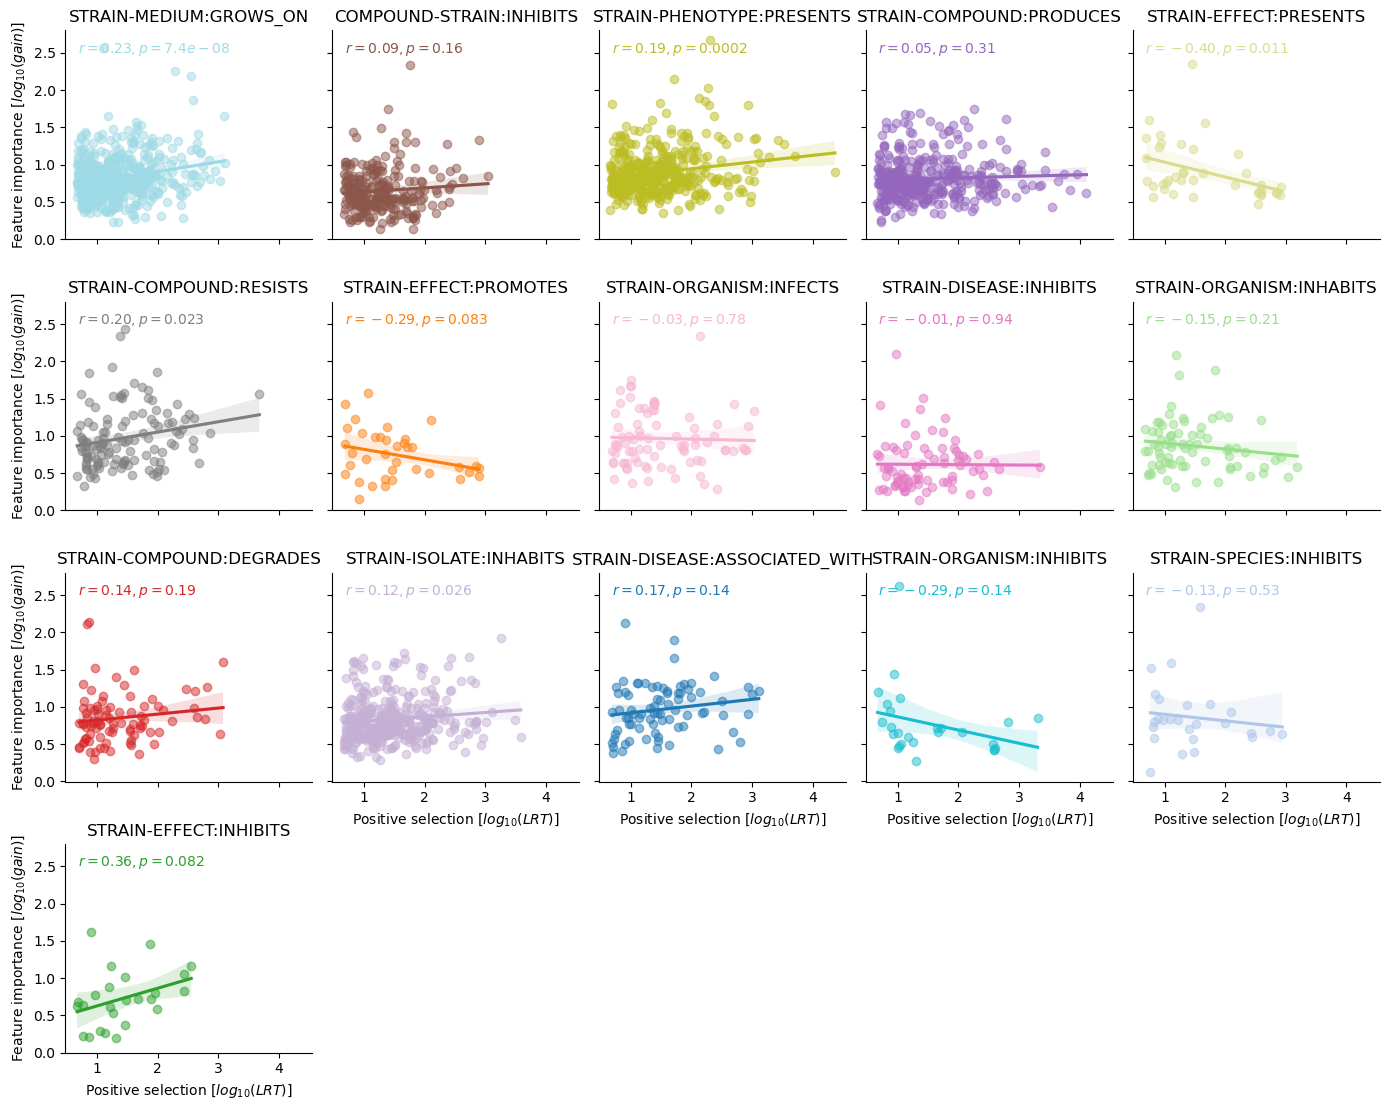

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.patches as mpatches

# Set the color palette to the accent color set
sns.set_palette("Dark2")

# Define the number of samples required for each category
SAMPLES_PER_CATEGORY = 15

# Define the desired order for 'rel' categories
category_order = [
    "STRAIN-MEDIUM:GROWS_ON",
    "COMPOUND-STRAIN:INHIBITS",
    "STRAIN-PHENOTYPE:PRESENTS",
    "STRAIN-COMPOUND:PRODUCES",
    "STRAIN-EFFECT:PRESENTS",
    "STRAIN-COMPOUND:RESISTS",
    "STRAIN-EFFECT:PROMOTES",
    "STRAIN-ORGANISM:INFECTS",
    "STRAIN-DISEASE:INHIBITS",
    "STRAIN-ORGANISM:INHABITS",
    "STRAIN-COMPOUND:DEGRADES",
    "STRAIN-ISOLATE:INHABITS",
    "STRAIN-DISEASE:ASSOCIATED_WITH",
    "STRAIN-ORGANISM:INHIBITS",
    "STRAIN-SPECIES:INHIBITS",
    "STRAIN-ORGANISM:SYMBIONT_OF",
    "STRAIN-EFFECT:INHIBITS"
]

# Filter the dataset as per your conditions
filtered_data = all_merged[
    (all_merged.p_value < 0.05) & 
    (all_merged.rel.isin(category_order))
]

# Count the number of samples in each category
category_counts = filtered_data['rel'].value_counts()

# Keep only categories with at least SAMPLES_PER_CATEGORY samples
valid_categories = category_counts[category_counts >= SAMPLES_PER_CATEGORY].index.tolist()

# Update the category_order to include only valid categories
category_order = [cat for cat in category_order if cat in valid_categories]

# Use all samples from each valid category without subsampling
final_data = filtered_data[filtered_data['rel'].isin(valid_categories)]

# Initialize a dictionary to store regression results
regression_results = {}

# Calculate regression statistics for each 'rel' subset after removing infinite values
for rel in category_order:
    subset = final_data[final_data['rel'] == rel]
    
    # Remove rows with infinite values in 'logLRT' or 'log_imp'
    subset_clean = subset[np.isfinite(subset['logLRT']) & np.isfinite(subset['log_imp'])]
    
    if len(subset_clean) >= 2:  # Need at least two points for linregress
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(subset_clean['logLRT'], subset_clean['log_imp'])
        
        # Store results in the dictionary
        regression_results[rel] = {
            'r': r_value,
            'p_value': p_value,
            'slope': slope,
            'intercept': intercept
        }
    else:
        # Store None if the subset does not have enough valid data
        regression_results[rel] = None

# Get the color map for the categories
rel_types = final_data['rel'].unique()
color_map = dict(zip(rel_types, plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(rel_types)))))

# Plot the data using lmplot
g = sns.lmplot(
    x="logLRT", 
    y="log_imp", 
    col="rel", 
    hue="rel", 
    data=final_data, 
    aspect=1, 
    height=2.8, 
    scatter_kws={"alpha": 0.5},
    col_order=category_order,  # Set column order
    hue_order=category_order,  # Set hue order
    col_wrap=5,                # Wrap the columns after every 4 plots
    palette=color_map          # Use the color map for the categories
)

g.set_axis_labels("Positive selection [$log_{10}(LRT)$]", "Feature importance [$log_{10}(gain)$]")

# Add text annotations for each subplot and set titles
for ax, rel in zip(g.axes.flat, category_order):
    results = regression_results[rel]
    
    if results is not None:
        line_color = color_map[rel]
        # Add text annotations for r and p-value
        ax.text(
            0.05, 0.95,  # X and Y positions (in axis units)
            f'$r = {results["r"]:.2f}, p = {results["p_value"]:.2g}$',
            transform=ax.transAxes,  # Use axis coordinates for positioning
            verticalalignment='top',  # Align text at the top
            color=line_color  # Use the same color as the line
        )

    # Set the title of each subplot to just the value of 'rel'
    ax.set_title(rel)

plt.tight_layout()
plt.savefig("figures/xgboost/positive_selection_latest.pdf", bbox_inches="tight")
plt.show()


In [32]:
subsampled_data.head(50).sort_values("logLRT",ascending=False)

,Unnamed: 0,rel,ner,gene_x,importance_values,importance_ranking,accuracy,name,p_value,lrt,-log10(p_value),logLRT,log_imp
16,98505,STRAIN-COMPOUND:DEGRADES,cellulose,Glycoside hydrolase family 9,40.166168,1.0,0.985524,first_STRAIN-COMPOUND:DEGRADES_cellulose,0.000000e+00,1200.681577,inf,3.079428,1.603860
24,137214,STRAIN-COMPOUND:DEGRADES,sodium_alginate,"ABC transporter type 1, transmembrane domain M...",4.336320,1.0,0.999238,first_STRAIN-COMPOUND:DEGRADES_sodium_alginate,0.000000e+00,1077.107521,inf,3.032259,0.637121
49,782602,STRAIN-COMPOUND:RESISTS,piperacillin_tazobactam,Transglycosylase SLT domain 1,8.741282,1.0,0.997774,first_STRAIN-COMPOUND:RESISTS_piperacillin_taz...,0.000000e+00,381.272184,inf,2.581235,0.941575
34,176566,STRAIN-COMPOUND:PRODUCES,sa,Double Cache domain 1,6.723921,1.0,0.998372,first_STRAIN-COMPOUND:PRODUCES_sa,0.000000e+00,359.443822,inf,2.555631,0.827623
33,171522,STRAIN-COMPOUND:PRODUCES,arginine,GGDEF domain,8.122675,1.0,0.998236,first_STRAIN-COMPOUND:PRODUCES_arginine,0.000000e+00,234.686202,inf,2.370488,0.909699
36,241246,STRAIN-COMPOUND:PRODUCES,o_specific_polysaccharide,"NapC/NirT cytochrome c, N-terminal",5.410833,1.0,0.999457,first_STRAIN-COMPOUND:PRODUCES_o_specific_poly...,0.000000e+00,224.584889,inf,2.351381,0.733264
19,106918,STRAIN-COMPOUND:DEGRADES,peptidoglycan,"Plasmid replication initiation, RepA",10.260864,1.0,0.994667,first_STRAIN-COMPOUND:DEGRADES_peptidoglycan,0.000000e+00,101.559089,inf,2.006719,1.011184
35,197532,STRAIN-COMPOUND:PRODUCES,phenazines,Phenazine biosynthesis protein A/B,8.486736,1.0,0.998915,first_STRAIN-COMPOUND:PRODUCES_phenazines,0.000000e+00,95.916045,inf,1.981891,0.928741
20,137101,STRAIN-COMPOUND:DEGRADES,e1,"3-ketosteroid-9-alpha-monooxygenase, oxygenase...",3.180068,1.0,0.999238,first_STRAIN-COMPOUND:DEGRADES_e1,0.000000e+00,86.204882,inf,1.935532,0.502436
30,192955,STRAIN-COMPOUND:PRODUCES,isoprene,PspA/VIPP1,7.661786,1.0,0.998847,first_STRAIN-COMPOUND:PRODUCES_isoprene,3.899658e-13,55.759269,12.408973,1.746317,0.884330


In [30]:
subsampled_data[["rel","ner","gene_x","logLRT","log_imp"]].sort_values("logLRT",ascending=False).head(5)

,rel,ner,gene_x,logLRT,log_imp
210,STRAIN-PHENOTYPE:PRESENTS,alkaliphilic,"Helix-turn-helix, HxlR type",3.713105,1.116306
202,STRAIN-ORGANISM:INHIBITS,rhizoctonia_solani,"Molybdenum cofactor biosynthesis protein F, N-...",3.306990,0.849974
220,STRAIN-PHENOTYPE:PRESENTS,form_biofilms,"UDP-glucose/GDP-mannose dehydrogenase, N-terminal",3.283629,1.096190
16,STRAIN-COMPOUND:DEGRADES,cellulose,Glycoside hydrolase family 9,3.079428,1.603860
24,STRAIN-COMPOUND:DEGRADES,sodium_alginate,"ABC transporter type 1, transmembrane domain M...",3.032259,0.637121
